In [ ]:
# Install necessary packages
!apt-get update
!apt-get install openbabel
!apt-get install -y autodock-vina
!pip install rdkit-pypi
!pip install rdkit-pypi


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [51.0 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [770 kB]
Get:13 http://security.ubuntu.co

In [ ]:
# Imports
import os
from google.colab import drive
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from IPython.display import display

In [ ]:
#check the valifity of the generated SMILES
def is_valid_smiles(smiles):
    """Check if a SMILES string is valid."""
    mol = Chem.MolFromSmiles(smiles)
    return mol is not None

# Read SMILES from a file, check their validity, and print valid ones
valid_smiles = []
with open('Optimized_smiles.txt', 'r') as file:
    for line in file:
        smiles = line.strip()
        if is_valid_smiles(smiles):
            valid_smiles.append(smiles)

# Print valid SMILES
if valid_smiles:
    print("Valid SMILES strings:")
    for smiles in valid_smiles:
        print(smiles)

    total_valid = len(valid_smiles)
    print(f"\nTotal number of valid SMILES strings: {total_valid}")
    if total_valid == 28:
        print("The file contains exactly 28 valid SMILES strings.")
    else:
        print("The file does not contain exactly 28 valid SMILES strings.")
else:
    print("No valid SMILES strings found.")


Valid SMILES strings:
O=C(CNc3cnc(C(=O)c2ccc1cc[nH]c1c2)nc3)N4CCCC4
O=C(CNc3cnc(C(=O)c2ccc1ccoc1c2)nc3)N4CCCC4
NC(c2ccc1cc[nH]c1c2)c4ncc(NCC(=O)N3CCCC3)cn4
NC(c2ccc1ccoc1c2)c4ncc(NCC(=O)N3CCCC3)cn4
O=C(CNc3ccc(C(=O)c2ccc1ccoc1c2)nc3)N4CCCC4
O=C(CNc3ccc(C(=O)c2ccc1ccoc1c2)cc3)N4CCCC4
O=C(CNc3cnc(C(=O)c2ccc1ccoc1c2)nn3)N4CCCC4
O=C(CNc3cn[n+](C(=O)c2ccc1ccoc1c2)cn3)N4CCCC4
O=C(CNc3cnc(C(=O)c2ccc1ccoc1c2)nn3)N4CCCC4
O=C(CNc3cnc(C(=O)c2ccc1ccoc1c2)nc3)N5CC4COCC4C5
O=C(CNc3cnc(C(=O)c2ccc1ccoc1c2)nc3)N4CCOC4
O=C(CNc3cnc(C(=O)c2ccc1ccoc1c2)nc3)N4CCOCC4
CN4CCN(C(=O)CNc3cnc(C(=O)c2ccc1ccoc1c2)nc3)CC4
O=C(CNc3cnc(C(=O)c2ccc1ccoc1c2)nc3)N4C5COCC4C5
Cc2ncc(NCC(=O)N1CCCC1)cn2
Cc3ncc2[nH]c(C(=O)N1CCCC1)cc2n3
Cc3ccc2[nH]c(C(=O)N1CCCC1)cc2c3
C[n+]3cnc2[nH]c(C(=O)N1CCCC1)cc2c3
C[n+]3cnc2[nH]c(C(=O)N1CCCC1)nc2c3
NC(c2ccc1ccoc1c2)c4ncc(NCC(=O)N3CCOCC3)cn4
NC(c2ccc1ccoc1c2)c4ncc(NCC(=O)N3CCCCC3)cn4
NC(c2ccc1ccoc1c2)c4ncc(NCC(=O)N3CCCC3)nn4
NC(c2ccc1ccoc1c2)c4cnc(NCC(=O)N3CCCC3)cn4
NC(c2ccc1ccoc1c2)c4ncc(NC

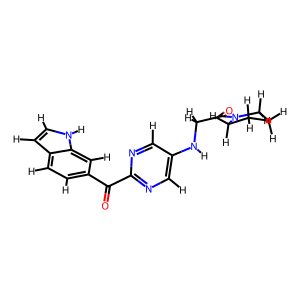

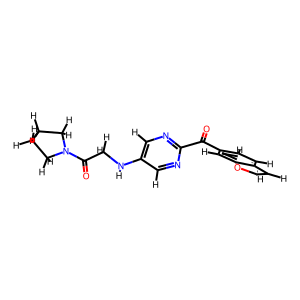

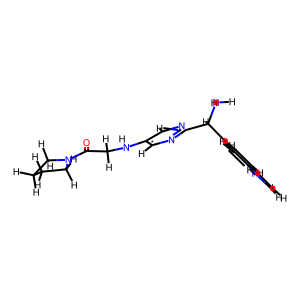

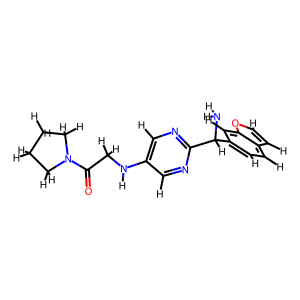

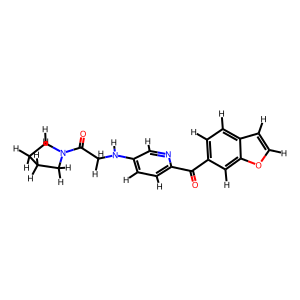

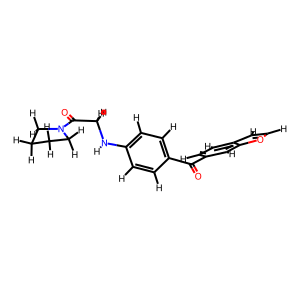

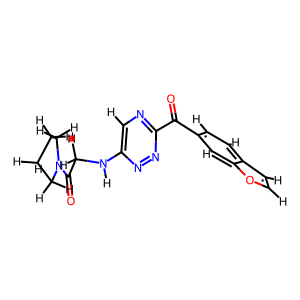

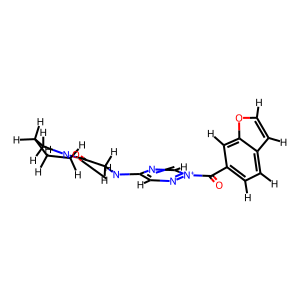

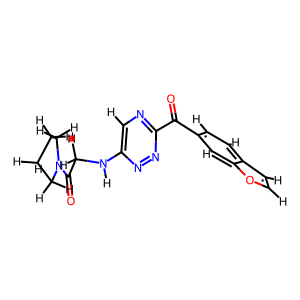

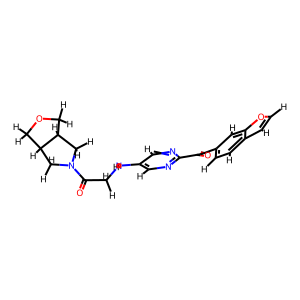

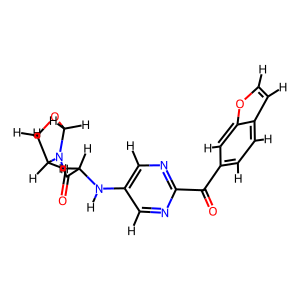

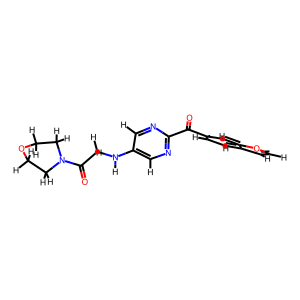

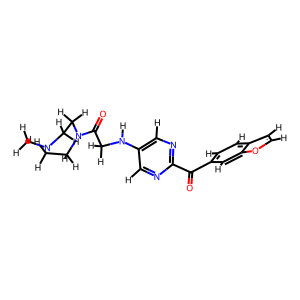

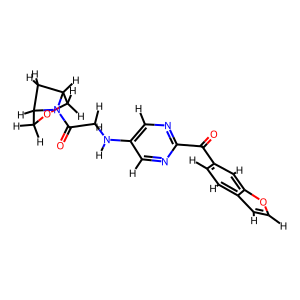

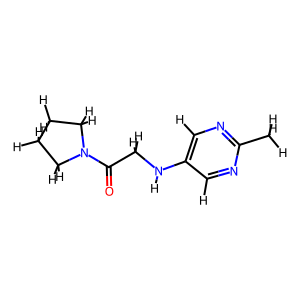

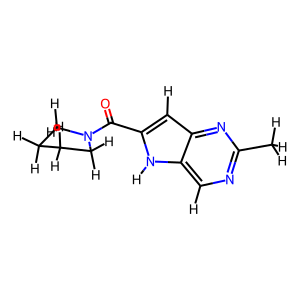

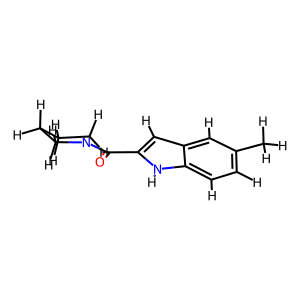

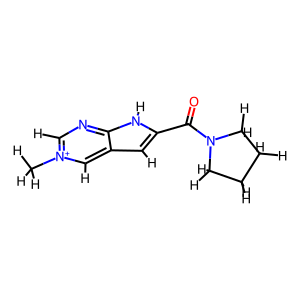

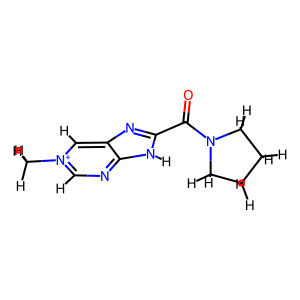

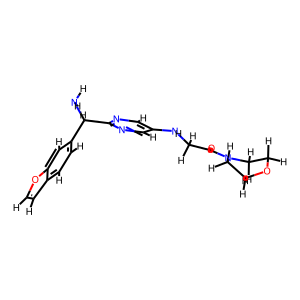

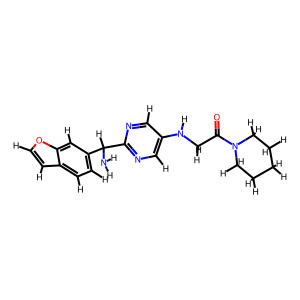

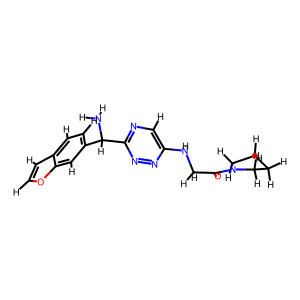

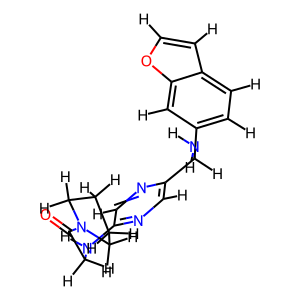

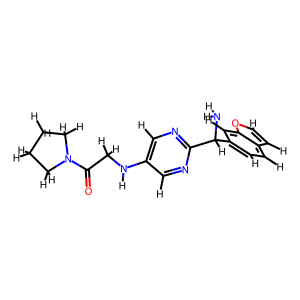

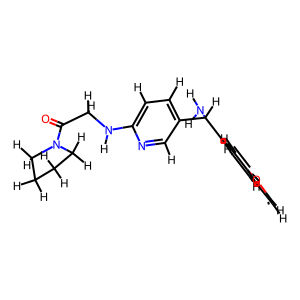

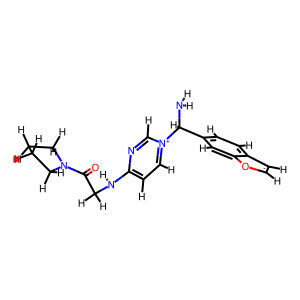

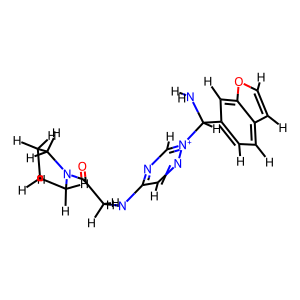

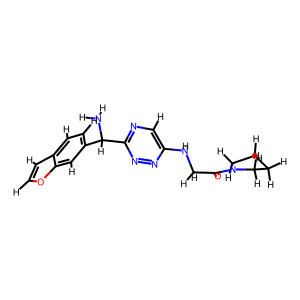

In [ ]:
# Read SMILES from a file
smiles_list = []
with open('Optimized_smiles.txt', 'r') as file:
    smiles_list = file.read().splitlines()

# Convert SMILES to RDKit Molecule objects
molecules = [Chem.MolFromSmiles(smiles) for smiles in valid_smiles]

num = 1
# Draw and display the 2D structures
for mol in molecules:
    mol = Chem.AddHs(mol)
    AllChem.EmbedMolecule(mol, randomSeed=42)  # Try different seeds
    AllChem.MMFFOptimizeMolecule(mol, maxIters=1000, nonBondedThresh=100.0)  # Adjust optimization parameters
    # Save to SDF file
    sdf_file = f"output{num}.sdf"
    num+=1
    w_sdf = Chem.SDWriter(sdf_file)
    w_sdf.write(mol)
    w_sdf.close()
    display(Draw.MolToImage(mol))



#After converting the SMILES into Molecules in SDF Format, download, convert to PDBQT, upload to Drive

In [ ]:
#Mount DRIVE and load ligands
drive.mount('/content/drive')
ligands = '/content/drive/My Drive/ligands'
os.chdir(ligands)

In [ ]:
#Dock the Ligands
num = 0
for file in os.listdir('.'):
  if file.endswith('.pdbqt'):
    if file == 'receptor.pdbqt':
        continue
    if file.endswith('.pdbqt'):
      print(file)
      # Construct the full path to your ligand file
      ligand_path = os.path.join(ligands, file)
      print(ligand_path)

      !vina --receptor receptor.pdbqt --ligand {file} --config config.txt --out output{num}.pdbqt
      num+=1

In [ ]:
!vina --receptor receptor.pdbqt --ligand ligand3.pdbqt --config config.txt --out output3.pdbqt


AutoDock Vina v1.2.3
#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# J. Eberhardt, D. Santos-Martins, A. F. Tillack, and S. Forli  #
# AutoDock Vina 1.2.0: New Docking Methods, Expanded Force      #
# Field, and Python Bindings, J. Chem. Inf. Model. (2021)       #
# DOI 10.1021/acs.jcim.1c00203                                  #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, J. Comp. Chem. (2010)                         #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see https://github.com/ccsb-scripps/AutoDock-V

In [ ]:
!vina --receptor receptor.pdbqt --ligand ligand4.pdbqt --config config.txt --out output4.pdbqt


AutoDock Vina v1.2.3
#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# J. Eberhardt, D. Santos-Martins, A. F. Tillack, and S. Forli  #
# AutoDock Vina 1.2.0: New Docking Methods, Expanded Force      #
# Field, and Python Bindings, J. Chem. Inf. Model. (2021)       #
# DOI 10.1021/acs.jcim.1c00203                                  #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, J. Comp. Chem. (2010)                         #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see https://github.com/ccsb-scripps/AutoDock-V

In [ ]:
!vina --receptor receptor.pdbqt --ligand ligand5.pdbqt --config config.txt --out output5.pdbqt


AutoDock Vina v1.2.3
#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# J. Eberhardt, D. Santos-Martins, A. F. Tillack, and S. Forli  #
# AutoDock Vina 1.2.0: New Docking Methods, Expanded Force      #
# Field, and Python Bindings, J. Chem. Inf. Model. (2021)       #
# DOI 10.1021/acs.jcim.1c00203                                  #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, J. Comp. Chem. (2010)                         #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see https://github.com/ccsb-scripps/AutoDock-V

In [ ]:
!vina --receptor receptor.pdbqt --ligand ligand6.pdbqt --config config.txt --out output6.pdbqt


AutoDock Vina v1.2.3
#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# J. Eberhardt, D. Santos-Martins, A. F. Tillack, and S. Forli  #
# AutoDock Vina 1.2.0: New Docking Methods, Expanded Force      #
# Field, and Python Bindings, J. Chem. Inf. Model. (2021)       #
# DOI 10.1021/acs.jcim.1c00203                                  #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, J. Comp. Chem. (2010)                         #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see https://github.com/ccsb-scripps/AutoDock-V